In [75]:
#Import of software packages
import scanpy as sc
import scvi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Download of Data

The data analysed in this notebook is from Poggetto E; Ho I et al Science 2025 (PMID:34529467). Data can be found on GEO under accession number GSM5494073. ScRNA-seq data are stored in the series GSE181276. The link below can be found by going to https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE181276 and with right click copy the "http" hyperlink in the Download column.

The flags are required to download this file otherwise it downloads only a HTML page:
-L --> redirects it to the actual file (genes.counts.txt.gz), without it would only download a HTML page.
-O --> tells curl that it saves the file using the URL filename (without it would be in printed in the terminal)
-J --> tells curl to use the name instead of the final url segment


In [ ]:
#Create new direcotry for rawdata
!mkdir -p rawdata
# Download data using curl
!cd rawdata && curl -L -O -J "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE181276&format=file&file=GSE181276_genes.counts_for_GEO_uploading.txt.gz"
# Unzip the gene_counts file in the rawdata folder
!cd rawdata && gunzip "GSE181276_genes.counts_for_GEO_uploading.txt.gz"

In [2]:
# Read file but transpose it as Anndata and Scanpy require cells (barcodes) as rows and gene names in columns (but file has gene names as rows)
adata = sc.read_text('rawdata/GSE181276_genes.counts_for_GEO_uploading.txt').T

In [3]:
# adata.obs contains cell barcodes
adata.obs

""
WT_AAACCCAAGCATCTTG
WT_AAACCCAAGGGTTGCA
WT_AAACCCAGTCCGAAAG
WT_AAACCCAGTCCGTTTC
WT_AAACCCAGTGTGGTCC
...
D7_analysis_TTTGTTGGTGAGCAGT
D7_analysis_TTTGTTGGTGCCTGAC
D7_analysis_TTTGTTGGTTGAGAGC
D7_analysis_TTTGTTGTCCTTATAC


In [4]:
#adata.var contains Gene Names
adata.var

""
Xkr4
Gm1992
Gm37381
Rp1
Sox17
...
AC168977.1
AC149090.1
CAAA01118383.1
Vmn2r122


In [5]:
# Shows size of count matrix (n_cells, n_genes)
adata.shape

(33681, 31053)

This is a time-course experiment, with samples collected from different mice at various timepoints following pancreatitis. Library preparation was also performed on separate days. Therefore, batch effects are expected and will be corrected using scVI, which operates directly on raw count data. We will perform standard normalization later for methods within Scanpy that require it — but not for scVI Input. However, we do normal quality control and preprocessing.

In [10]:
#Filter genes that they need to occur at least in 5 cells
sc.pp.filter_genes(adata,min_cells=3)
#Filter cells to have at least 200 genes expressed
sc.pp.filter_cells(adata, min_genes=200) # was already done by authors here but we can just run it again.

In [23]:
adata.shape

(33681, 18815)

In [12]:
# Annotate Ribosomal and mitochondrial genes (boolean) in adata.var
adata.var['mt']= adata.var_names.str.startswith('mt-')
adata.var['ribo']= adata.var_names.str.startswith(('Rps','Rpl'))                         

In [27]:
# We will also annotate the batch of the cells as we need it later
adata.obs['batch'] = adata.obs.index.str.split('_').str[0]

# QC

In [14]:
# Calculate QC Metrics using scanpy function.
sc.pp.calculate_qc_metrics(adata, qc_vars=('ribo','mt'),inplace=True,log1p=True,percent_top=[20])

**qc_vars** are boolean columns of variables we want to control for <br>
**inplace=True** saves the metrics in adata.obs and adata.vars (n_cells/genes_by_counts are depending on adata object). <br>
**percent_top[20]** can be used to assess library complexity. It is the cumulative percentage of total counts per cell derived from the top20 (number can be determined) highly expressed genes. This tells you how concentrated the reads are. If 70% of reads are accumulated in the top50 highly expressed genes the scRNA-seq library has a low complexity and the data therefore is most likely not suited for detailed anlayses.  <br>
Lets first investige library complextiy:

<Axes: xlabel='pct_counts_in_top_20_genes', ylabel='Density'>

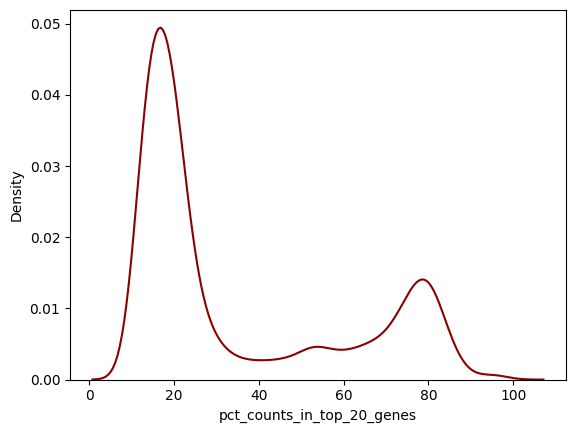

In [19]:
# Histogram for top 20 genes
sns.kdeplot(adata.obs['pct_counts_in_top_20_genes'], color='darkred')

This plot indicates that the library complexity is generally acceptable. Most cells show 15–30% of their total counts coming from the top 20 most highly expressed genes — a range typically considered indicative of good complexity. However, a subset of cells displays much higher values, suggesting that their transcriptomes are dominated by a few genes, which may reflect lower complexity.

That said, this pattern could also be biologically driven. In the pancreas, certain cell types — particularly acinar cells — naturally express high levels of digestive enzyme genes. This is a known feature even in bulk RNA-seq data and reflects true biology rather than technical artifacts. In this case, we assume that the library preparation and sample quality are adequate, as the observed patterns are most likely biologically driven and unlikely to affect downstream analysis. However, in general, such metrics should be carefully examined to assess overall sample quality and library complexity.

<Axes: xlabel='total_counts', ylabel='pct_counts_in_top_20_genes'>

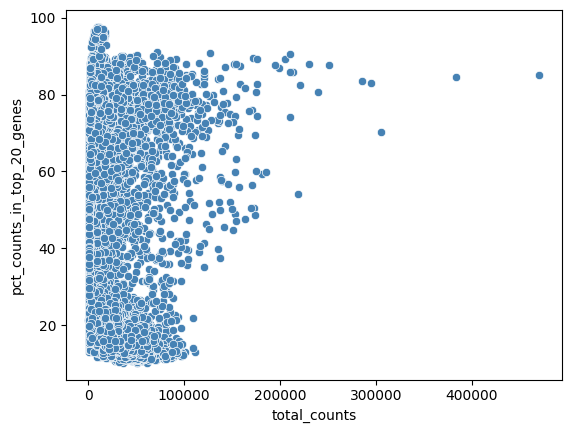

In [21]:
sns.scatterplot(x=adata.obs['total_counts'],y=adata.obs['pct_counts_in_top_20_genes'],color ='steelblue')

This plot shows us that cells where few genes account for most of the reads are not necessary cells with low reads. But many of those even have a lot of reads (which is good). For this reason that confirms that this is most likely biology and not an technical artifact (because than one would expect that those cells might have very low reads at all). 

Next we will check standard quality measurements (ribosomal and mitochondrial gene content of cells, total counts etc.). We do this batch specific:

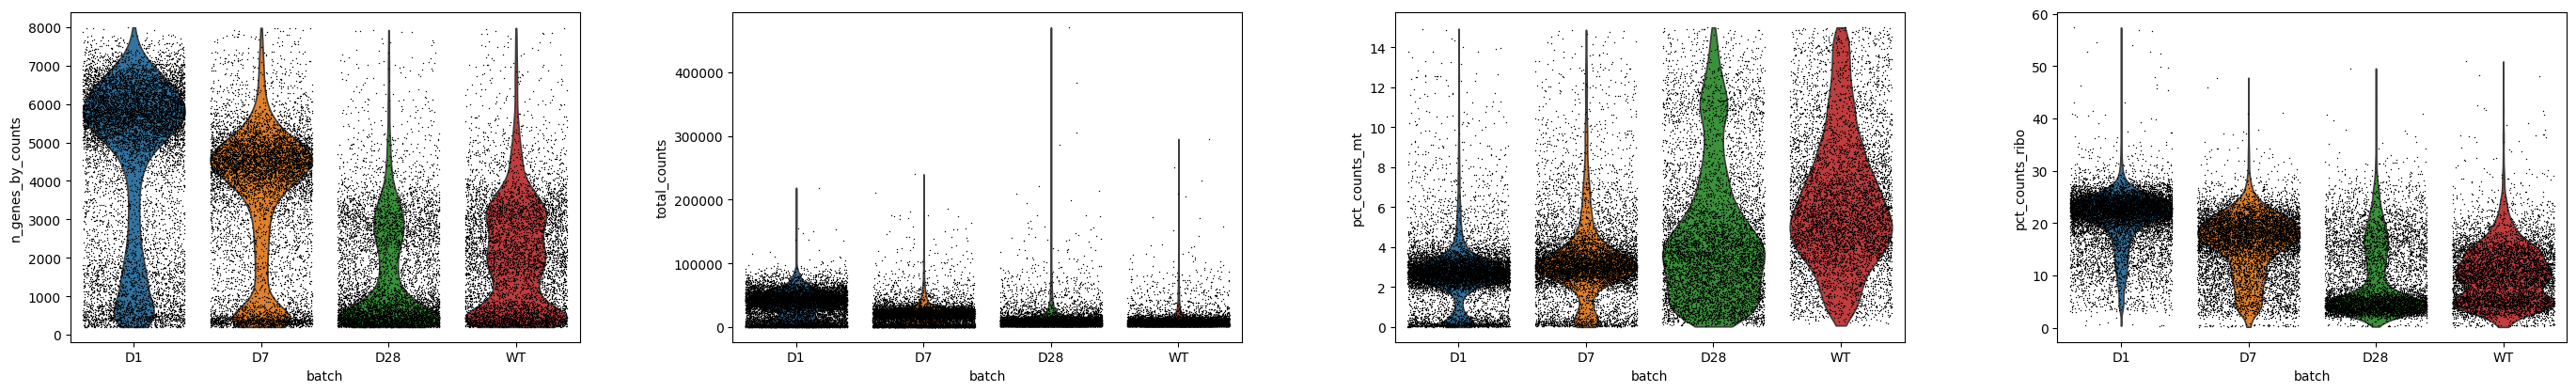

In [29]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], groupby='batch',
             jitter = 0.4, multi_panel = True)

The quality control should be run "batch" specific since those can differ dramatically as we see here. Some observations we make here: <br>

1.) In general we can observe that D1 and D7 samples are much better quality than D28 and WT samples. D28 and WT samples have lower n_genes_by_counts values, some cells have exteremyl high total counts (especialy D28).

2.) D28 and WT cells contain more cells with higher mitochondrial RNA content, however most of them are not higher than 15%. This might still be fine. We will probably first apply loose filtering setting and will come back if the data is not interpretable to this step. Then we still can apply stricter filterings.

3.) The D1 and D7 samples have higher ribosomal RNA content. This is explainable most likely by biology since during pancreatitis a lot of cells die. But also D28 and WT cells contains cells with high ribosomal values, indicating that the isolation method for the cells probably was a little harsh. 

Another way to depict this is using KDE Plots (shows the same):

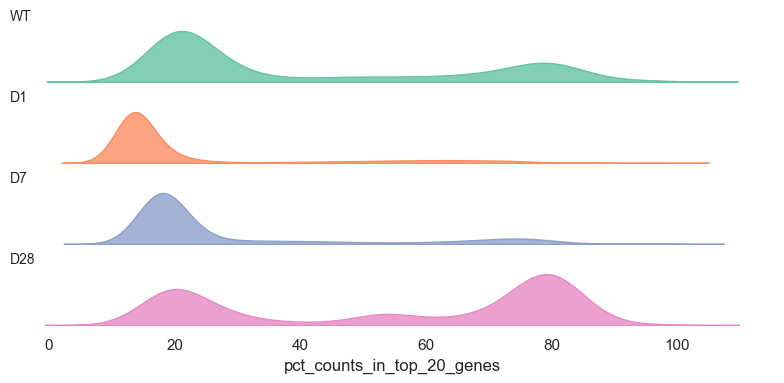

In [47]:
# Define variable and batch column
variable = 'pct_counts_in_top_20_genes'
#variable = 'n_genes'
#variable = 'pct_counts_mt'
#variable = 'pct_counts_ribo'
batch_column = 'batch'

# Get unique batches (sorted for consistent order)
batch_groups = ['WT','D1','D7','D28']

# Set up subplots
fig, axes = plt.subplots(len(batch_groups), 1, figsize=(8, 1 * len(batch_groups)), sharex=True)

# Optional: use a consistent color palette
palette = sns.color_palette("Set2", n_colors=len(batch_groups))

# Plot one KDE per batch
for i, batch in enumerate(batch_groups):
    subset = adata.obs[adata.obs[batch_column] == batch]

    sns.kdeplot(
        data=subset,
        x=variable,
        fill=True,
        alpha=0.8,
        ax=axes[i],
        color=palette[i]
    )
    axes[i].set_ylabel("")  # Optional: remove y-label for clean look
    axes[i].set_yticks([])  # Remove y-axis ticks
    axes[i].set_title(f"{batch}", fontsize=10, loc='left')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)

axes[-1].set_xlabel(variable)
plt.tight_layout(h_pad=0.5)  # Adjust spacing between plots
plt.show()


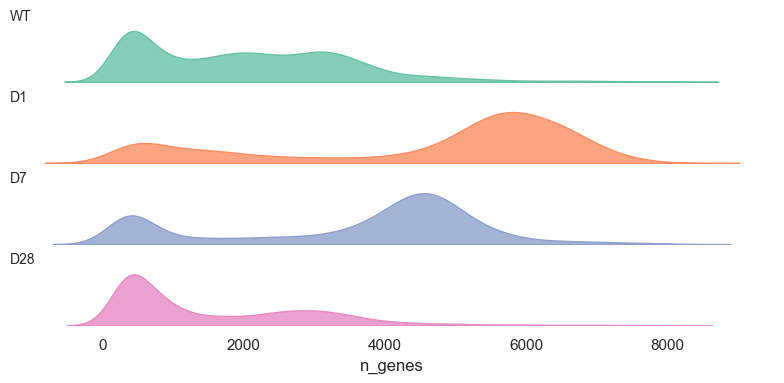

In [48]:
# Define variable and batch column
#variable = 'pct_counts_in_top_20_genes'
variable = 'n_genes'
#variable = 'pct_counts_mt'
#variable = 'pct_counts_ribo'
batch_column = 'batch'

# Get unique batches (sorted for consistent order)
batch_groups = ['WT','D1','D7','D28']

# Set up subplots
fig, axes = plt.subplots(len(batch_groups), 1, figsize=(8, 1 * len(batch_groups)), sharex=True)

# Optional: use a consistent color palette
palette = sns.color_palette("Set2", n_colors=len(batch_groups))

# Plot one KDE per batch
for i, batch in enumerate(batch_groups):
    subset = adata.obs[adata.obs[batch_column] == batch]

    sns.kdeplot(
        data=subset,
        x=variable,
        fill=True,
        alpha=0.8,
        ax=axes[i],
        color=palette[i]
    )
    axes[i].set_ylabel("")  # Optional: remove y-label for clean look
    axes[i].set_yticks([])  # Remove y-axis ticks
    axes[i].set_title(f"{batch}", fontsize=10, loc='left')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)

axes[-1].set_xlabel(variable)
plt.tight_layout(h_pad=0.5)  # Adjust spacing between plots
plt.show()


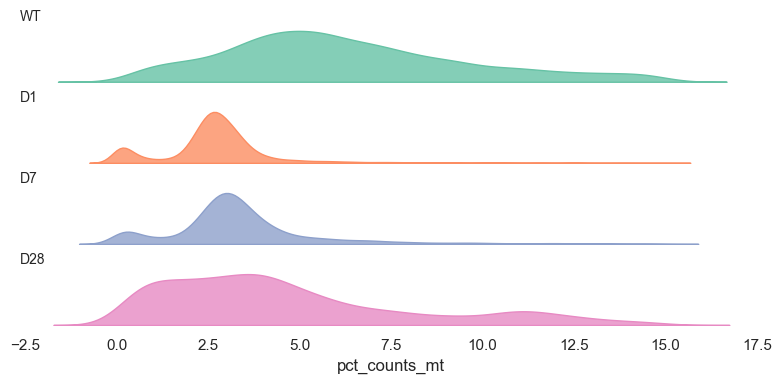

In [49]:
# Define variable and batch column
#variable = 'pct_counts_in_top_20_genes'
#variable = 'n_genes'
variable = 'pct_counts_mt'
#variable = 'pct_counts_ribo'
batch_column = 'batch'

# Get unique batches (sorted for consistent order)
batch_groups = ['WT','D1','D7','D28']

# Set up subplots
fig, axes = plt.subplots(len(batch_groups), 1, figsize=(8, 1 * len(batch_groups)), sharex=True)

# Optional: use a consistent color palette
palette = sns.color_palette("Set2", n_colors=len(batch_groups))

# Plot one KDE per batch
for i, batch in enumerate(batch_groups):
    subset = adata.obs[adata.obs[batch_column] == batch]

    sns.kdeplot(
        data=subset,
        x=variable,
        fill=True,
        alpha=0.8,
        ax=axes[i],
        color=palette[i]
    )
    axes[i].set_ylabel("")  # Optional: remove y-label for clean look
    axes[i].set_yticks([])  # Remove y-axis ticks
    axes[i].set_title(f"{batch}", fontsize=10, loc='left')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)

axes[-1].set_xlabel(variable)
plt.tight_layout(h_pad=0.5)  # Adjust spacing between plots
plt.show()


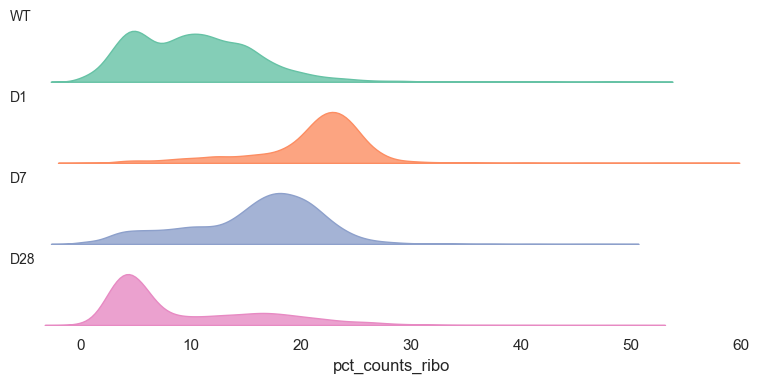

In [50]:
# Define variable and batch column
#variable = 'pct_counts_in_top_20_genes'
#variable = 'n_genes'
#variable = 'pct_counts_mt'
variable = 'pct_counts_ribo'
batch_column = 'batch'

# Get unique batches (sorted for consistent order)
batch_groups = ['WT','D1','D7','D28']

# Set up subplots
fig, axes = plt.subplots(len(batch_groups), 1, figsize=(8, 1 * len(batch_groups)), sharex=True)

# Optional: use a consistent color palette
palette = sns.color_palette("Set2", n_colors=len(batch_groups))

# Plot one KDE per batch
for i, batch in enumerate(batch_groups):
    subset = adata.obs[adata.obs[batch_column] == batch]

    sns.kdeplot(
        data=subset,
        x=variable,
        fill=True,
        alpha=0.8,
        ax=axes[i],
        color=palette[i]
    )
    axes[i].set_ylabel("")  # Optional: remove y-label for clean look
    axes[i].set_yticks([])  # Remove y-axis ticks
    axes[i].set_title(f"{batch}", fontsize=10, loc='left')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)

axes[-1].set_xlabel(variable)
plt.tight_layout(h_pad=0.5)  # Adjust spacing between plots
plt.show()


# Preprocessing

In [106]:
!pip install louvain

  Using cached louvain-0.8.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (1.5 kB)
Using cached louvain-0.8.2-cp310-cp310-macosx_11_0_arm64.whl (185 kB)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [56]:
import doubletdetection
from scipy.stats import median_abs_deviation as mad

We will use the Median Absolute Deviation (MAD) to filter out cells based on specific QC metrics. This filtering will be performed batch-wise — as it should be — since, as shown above, the batches differ significantly in their QC profiles. Applying the same global threshold across all batches would be inappropriate and could lead to biased filtering.

In [80]:
# This is how we can filter for each batch in the anndata file
a = adata[adata.obs['batch'] == 'WT'].obs['log1p_total_counts']
a

WT_AAACCCAAGCATCTTG     9.284705
WT_AAACCCAAGGGTTGCA     8.395929
WT_AAACCCAGTCCGAAAG     8.635154
WT_AAACCCAGTCCGTTTC    10.108426
WT_AAACCCAGTGTGGTCC     8.253227
                         ...    
WT_TTTGTTGCAACTGAAA     9.500245
WT_TTTGTTGCAGCTACCG     8.777710
WT_TTTGTTGCATACTGTG     9.856291
WT_TTTGTTGTCAGCACCG     8.227910
WT_TTTGTTGTCGGCTGGT    10.670815
Name: log1p_total_counts, Length: 6943, dtype: float32

The median of WT is 8.835210800170898
The 5 times MAD substracted lower border of WT is 6.0665130615234375
The 5 times MAD added higher border of WT is 11.60390853881836


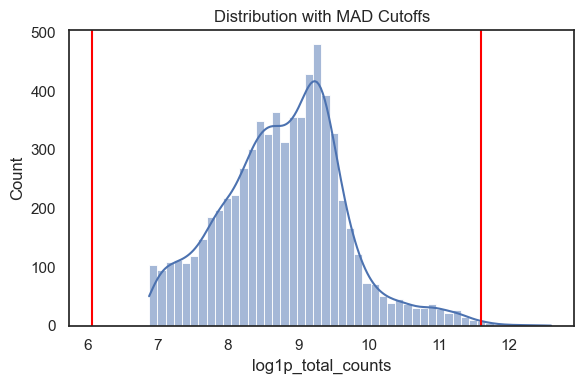

In [92]:
# This is an example only and does not need to be run. 
# It shall only illustrate what happens in the function demonstrated on a single example for one metric (log1pt_total_counts.
# The function below will also work on other metrics like gene_counts, pct_counts_mt etc and integrate all of those!
#Just one example of how to calculate the median
print(f"The median of {a.index[0].split('_')[0]} is {np.median(a)}")
# Calcuates the lower cutoff (median - 5* MAD)
print(f"The 5 times MAD substracted lower border of {a.index[0].split('_')[0]} is {np.median(a)- 5* mad(a)}")
# Calcuates the high cutoff (median + 5* MAD)
print(f"The 5 times MAD added higher border of {a.index[0].split('_')[0]} is {np.median(a)+ 5* mad(a)}")

# Plotting of log1p_total_counts distribution with calcualted cutoffs
%matplotlib inline
plt.figure(figsize=(6, 4))
sns.histplot(a, kde=True)
plt.axvline(np.median(a) - 5 * mad(a), color='red', linestyle='-')
plt.axvline(np.median(a) + 5 * mad(a), color='red', linestyle='-')
plt.xlabel('log1p_total_counts')
plt.title('Distribution with MAD Cutoffs')
plt.tight_layout()
plt.show()


We will use the Median Absolute Deviation (MAD) to filter out cells based on specific QC metrics. This filtering will be performed batch-wise — as it should be — since, as shown above, the batches differ significantly in their QC profiles. Applying the same global threshold across all batches would be inappropriate and could lead to biased filtering.

In [107]:
def outlier_mad(adata, metric, nmads, batch_key='batch', upper_only=False, return_thresholds=False):
    """
    Identifies outlier cells based on the Median Absolute Deviation (MAD), applied per batch.

    Parameters:
    - adata: AnnData object
    - metric: str, name of the metric in adata.obs
    - nmads: float, number of MADs from the median
    - batch_key: str, column in adata.obs with batch labels
    - upper_only: bool, if True, only detects high outliers
    - return_thresholds: bool, if True, also returns dict of thresholds per batch

    Returns:
    - mask: np.ndarray of booleans, marking outliers
    - thresholds (optional): dict with {batch: (lower, upper)} thresholds
    """
    mask = np.full(adata.n_obs, False)
    thresholds = {}

    for batch in adata.obs[batch_key].unique():
        idx = adata.obs[batch_key] == batch
        values = adata.obs.loc[idx, metric]

        med = np.median(values)
        deviation = mad(values)
        lower = med - nmads * deviation
        upper = med + nmads * deviation

        if not upper_only:
            outlier_cond = (values < lower) | (values > upper)
        else:
            outlier_cond = values > upper

        mask[idx] = outlier_cond
        thresholds[batch] = (None, upper) if upper_only else (lower, upper)

    if return_thresholds:
        return mask, thresholds
    return mask


In [108]:
doub_clf = doubletdetection.BoostClassifier(
    n_iters=10,
    clustering_algorithm="louvain",
    standard_scaling=True,
    pseudocount=0.1,
    n_jobs=-1)

In [109]:
def preprocessing(adata):
    """
    Runs the preprocessing steps and filtering on adata

    Parameters:
    - adata: AnnData object

    Returns:
    Adata filtered for QC and doublet removal. 
    """
    # General Fitlering for mitochondrial reads before batch-corrected removal. Everything above 20 is dead or dying anyhow. 
    adata = adata[adata.obs.pct_counts_mt < 20]

    bool_vector = outlier_mad(adata, 'log1p_total_counts', 5) + \
                  outlier_mad(adata, 'log1p_n_genes_by_counts', 5) +\
                  outlier_mad(adata, 'pct_counts_ribo', 5) +\
                  outlier_mad(adata, 'pct_counts_mt', 3, upper_only=True)
    adata = adata[~bool_vector]

    adata.uns['cells_removed'] = sum(bool_vector)

    doublets = doub_clf.fit(adata.X).predict(p_thresh=1e-3, voter_thresh=0.5)
    doublet_score = doub_clf.doublet_score()

    adata.obs['doublet'] = doublets
    adata.obs['doublet_score'] = doublet_score

    adata.uns['doublets_removed'] = adata.obs.doublet.sum()
    adata = adata[adata.obs.doublet == 0]

    return adata


In [110]:
# Before Preprocessing
print(adata.obs.columns)
print(adata.shape)
adata.obs

Index(['n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'pct_counts_in_top_20_genes',
       'batch'],
      dtype='object')
(33681, 18815)


,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,pct_counts_in_top_20_genes,batch
WT_AAACCCAAGCATCTTG,3176,3176,8.063693,10771.0,9.284705,30.405719,40.144833,1581.0,7.366445,14.678303,603.0,6.403574,5.598366,21.539319,WT
WT_AAACCCAAGGGTTGCA,1764,1764,7.475906,4428.0,8.395929,36.924119,44.918699,333.0,5.811141,7.520326,520.0,6.255750,11.743451,29.132791,WT
WT_AAACCCAGTCCGAAAG,2126,2126,7.662468,5625.0,8.635154,28.888889,39.502222,848.0,6.744059,15.075556,226.0,5.424950,4.017778,19.502222,WT
WT_AAACCCAGTCCGTTTC,3657,3657,8.204672,24548.0,10.108426,33.562816,50.570311,8724.0,9.073948,35.538536,1726.0,7.454141,7.031123,17.818152,WT
WT_AAACCCAGTGTGGTCC,1568,1568,7.358194,3839.0,8.253227,31.336285,41.625423,542.0,6.297109,14.118260,289.0,5.669881,7.528002,21.281584,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D7_analysis_TTTGTTGGTGAGCAGT,312,312,5.746203,554.0,6.318968,50.180505,61.732852,67.0,4.219508,12.093863,52.0,3.970292,9.386282,37.725632,D7
D7_analysis_TTTGTTGGTGCCTGAC,3911,3911,8.271804,17354.0,9.761636,32.459375,43.500058,2642.0,7.879670,15.224155,462.0,6.137727,2.662210,22.017979,D7
D7_analysis_TTTGTTGGTTGAGAGC,4913,4913,8.499844,28629.0,10.262211,32.369276,43.700444,4857.0,8.488382,16.965315,867.0,6.766191,3.028398,21.946278,D7
D7_analysis_TTTGTTGTCCTTATAC,4538,4538,8.420462,21376.0,9.970071,29.734281,39.782934,2914.0,7.977625,13.632112,563.0,6.335054,2.633795,19.704341,D7


In [111]:
adata = preprocessing(adata)

/var/folders/vn/wdw36m4d5k13n07b5xlhgmsr0000gn/T/ipykernel_20567/1646817697.py:20: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['cells_removed'] = sum(bool_vector)


  0%|          | 0/10 [00:00<?, ?it/s]

In [112]:
print(adata.shape)
adata.obs

(24675, 18815)


,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,pct_counts_in_top_20_genes,batch,doublet,doublet_score
WT_AAACCCAAGCATCTTG,3176,3176,8.063693,10771.0,9.284705,30.405719,40.144833,1581.0,7.366445,14.678303,603.0,6.403574,5.598366,21.539319,WT,0.0,1.772240e-04
WT_AAACCCAAGGGTTGCA,1764,1764,7.475906,4428.0,8.395929,36.924119,44.918699,333.0,5.811141,7.520326,520.0,6.255750,11.743451,29.132791,WT,0.0,5.992385e-24
WT_AAACCCAGTCCGAAAG,2126,2126,7.662468,5625.0,8.635154,28.888889,39.502222,848.0,6.744059,15.075556,226.0,5.424950,4.017778,19.502222,WT,0.0,1.101323e+00
WT_AAACCCAGTGTGGTCC,1568,1568,7.358194,3839.0,8.253227,31.336285,41.625423,542.0,6.297109,14.118260,289.0,5.669881,7.528002,21.281584,WT,0.0,2.249266e-08
WT_AAACCCATCCGCACTT,863,863,6.761573,1454.0,7.282761,29.986245,41.609354,331.0,5.805135,22.764788,65.0,4.189655,4.470427,17.400275,WT,0.0,5.275699e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D7_analysis_TTTGGTTTCTAGGCCG,4799,4799,8.476371,23741.0,10.075001,28.221221,38.957921,3791.0,8.240649,15.968156,819.0,6.709304,3.449728,18.209006,D7,0.0,1.225456e-02
D7_analysis_TTTGTTGAGAGCTTTC,4848,4848,8.486528,27568.0,10.224447,28.170342,42.259141,6428.0,8.768575,23.316889,823.0,6.714170,2.985345,15.891613,D7,0.0,1.478029e-04
D7_analysis_TTTGTTGGTGCCTGAC,3911,3911,8.271804,17354.0,9.761636,32.459375,43.500058,2642.0,7.879670,15.224155,462.0,6.137727,2.662210,22.017979,D7,0.0,1.524484e-16
D7_analysis_TTTGTTGGTTGAGAGC,4913,4913,8.499844,28629.0,10.262211,32.369276,43.700444,4857.0,8.488382,16.965315,867.0,6.766191,3.028398,21.946278,D7,0.0,4.010731e-08


In [118]:
print(f" A total of {len(adata)} cells are left after preprocessing. \n In total {adata.uns['cells_removed']} have been removed because of quality control criteria and {adata.uns['doublets_removed']} cells were removed because they were identified as doublet.")

 A total of 24675 cells are left after preprocessing. 
 In total 7910 have been removed because of quality control criteria and 1096.0 cells were removed because they were identified as doublet.


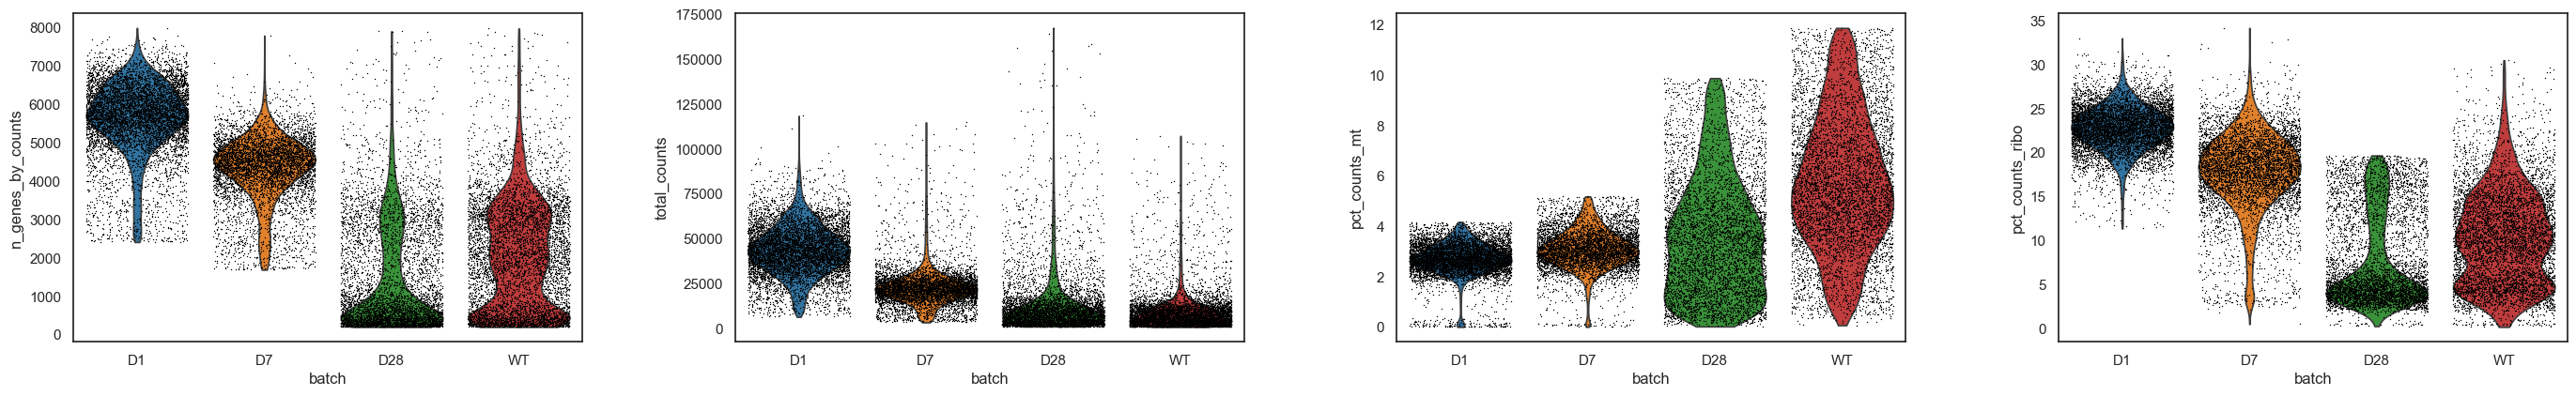

In [121]:
# See how preprocessing changed the samples strucutre from before
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], groupby='batch',
             jitter = 0.4, multi_panel = True)

In [125]:
adata.uns

{'batch_colors': array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], dtype='<U7'),
 'cells_removed': 7910,
 'doublets_removed': 1096.0}

In [126]:
adata.write('unintegrated_dataset.h5ad')

# Batch correction /Integration

In [ ]:
adata = sc.read('unintegrated_dataset.h5ad')

In [127]:
adata

View of AnnData object with n_obs × n_vars = 24675 × 18815
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'pct_counts_in_top_20_genes', 'batch', 'doublet', 'doublet_score'
    var: 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'batch_colors', 'cells_removed', 'doublets_removed'

First let's save the raw counts (not normalized or done anything to them yet) into a layer so we always have a backup. 

In [138]:
adata.layers["counts"] = adata.X.copy()

In [139]:
adata.layers

Layers with keys: counts



Let's use SCVI to do batch correction including our co-variates and see if we can improve the model (compare untuned vs. tuned). The paper did not use SCVI but only FastMNN (Seurat) to integrate the data. Let's see if machine learning helps to identify new clusters, improve seperation of clusters or gives us some new insights to understand the data better. 

### Untuned Model

In [168]:
adata.shape

(24675, 18815)

First, we will train the model only on a subset of data and for this we use the 2000 most highly variable expressed genes. 
This is good practice because of several reasons:

- speeds up training time
- less memory usage (important for big datasets > 20K cells)
- improves generalization (less overfitting and noise)
  
Biologically it means that it learns the most biologically variable features that help define cell identity and state (which is what we want!). Keep in mind: Most of the 18815 genes are expressed consistently (e.g. Housekeeping Genes) or only very lowly in cells! This also arguments learning from those would not help a lot (in worst case the model overfits)!.

So let's define the most differentially expressed genes as a subset and create a new annData file which we can use for training (do not overwrite the full one!)

In [ ]:
sc.pp.highly_variable_genes(adata

In [ ]:
adata_training = 

In [140]:
scvi.model.SCVI.setup_anndata(adata, layer='counts', batch_key='batch',
                     continuous_covariate_keys = ['pct_counts_mt', 'pct_counts_ribo'])

In [141]:
model = scvi.model.SCVI(adata)

In [142]:
model.train()

/Users/thorsten/.pyenv/versions/3.10.6/envs/SingleCell/lib/python3.10/site-packages/scvi/train/_trainrunner.py:69: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  accelerator, lightning_devices, device = parse_device_args(
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/thorsten/.pyenv/versions/3.10.6/envs/SingleCell/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/thorsten/.pyenv/versions/3.10.6/envs/SingleCell/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 

Training:   0%|          | 0/324 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=324` reached.


In [143]:
# It's always important to safe the model if you don't want to rerun it immediately (esepcially if you have long training time)
model.save('untuned_model')

In [166]:
model.history#['reconstruction_loss_validation']['reconstruction_loss_validation'].min()

{'kl_weight':       kl_weight
 epoch          
 0           0.0
 1        0.0025
 2         0.005
 3        0.0075
 4          0.01
 ...         ...
 319      0.7975
 320         0.8
 321      0.8025
 322       0.805
 323      0.8075
 
 [324 rows x 1 columns],
 'train_loss_step':       train_loss_step
 epoch                
 0        11343.054688
 1         9527.973633
 2         9578.160156
 3         9727.732422
 4         9582.080078
 ...               ...
 319       8006.351562
 320       9117.136719
 321       9250.941406
 322       9151.655273
 323       8317.342773
 
 [324 rows x 1 columns],
 'train_loss_epoch':       train_loss_epoch
 epoch                 
 0         11886.328125
 1         10270.820312
 2         10074.671875
 3          9946.207031
 4          9843.475586
 ...                ...
 319        9014.243164
 320        9014.402344
 321        9012.457031
 322        9014.147461
 323        9013.759766
 
 [324 rows x 1 columns],
 'elbo_train':          elbo_train


In [ ]:
plt.plot(model.history['reconstruction_loss_train']['reconstruction_loss_train'], label='train')
plt.plot(model.history['reconstruction_loss_validation']['reconstruction_loss_validation'], label='validation')

plt.axhline(y, c = 'k')

plt.legend()
plt.show()

In [144]:
adata.obsm["X_scVI"] = model.get_latent_representation()

In [156]:
adata.layers["scvi_normalized"] = model.get_normalized_expression()

In [157]:
sc.pp.neighbors(adata, use_rep="X_scVI")

In [158]:
sc.tl.leiden(adata, resolution = 2, key_added='overclustered')

In [159]:
sc.tl.umap(adata)

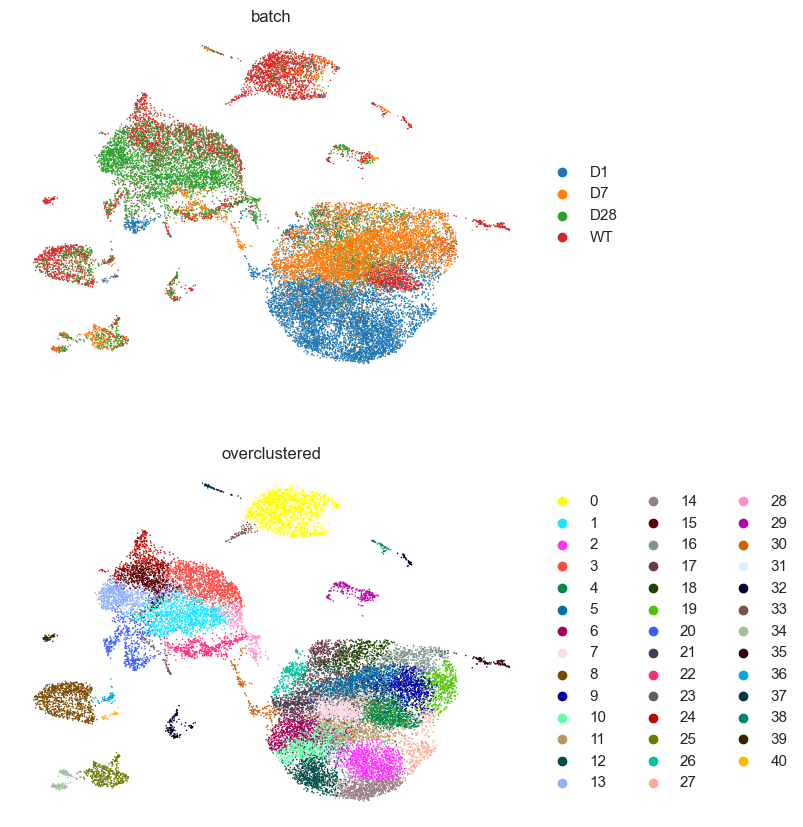

In [161]:
adata.uns.pop('leiden_colors', None) 
sc.pl.umap(
    adata,
    color=["batch", "overclustered"],
    frameon=False,
    ncols=1,
)

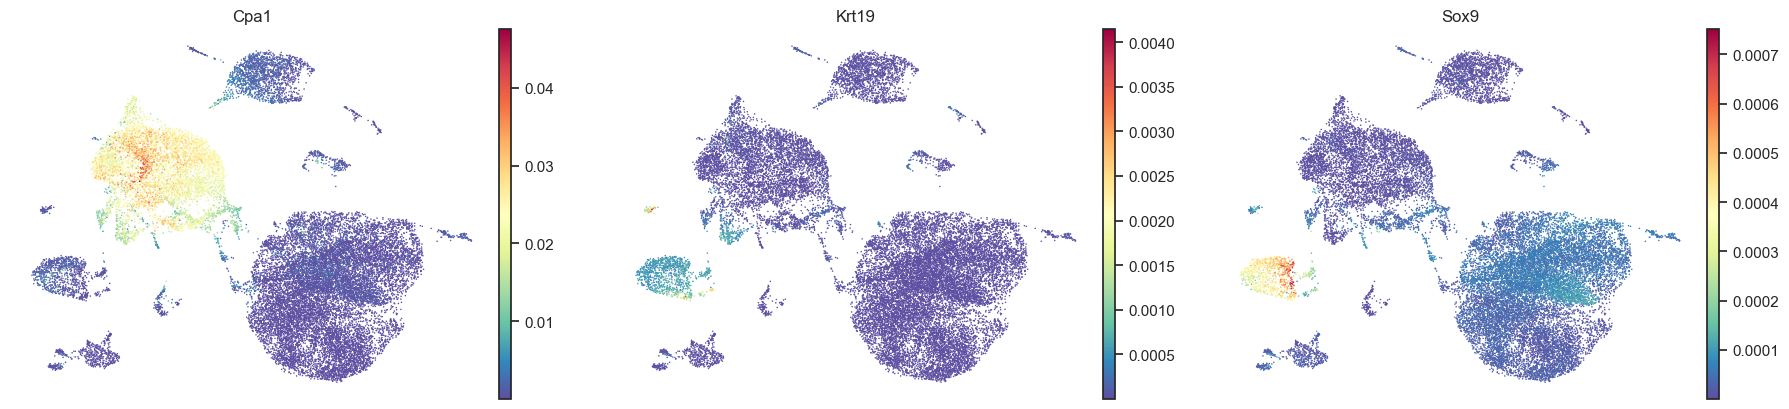

In [164]:
sc.pl.umap(adata, color = ['Cpa1','Krt19','Sox9'],layer='scvi_normalized', cmap='Spectral_r', frameon=False, )

In [163]:
adata.write_h5ad('temp.h5ad')

### Tuning the model